In [2]:
pip install yfinance matplotlib pandas


Importing essential libraries for financial data analysis and visualization

In [3]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download historical price data

In [4]:
# Set the time frame
start_date = '2025-01-01'
end_date = '2025-05-21'

In [5]:
data = yf.download(['BTC-USD', 'ETH-USD'], start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


Calculate daily returns

In [6]:
# Print the raw data to confirm structure
print("Raw Data:")
print(data.head())

Raw Data:
Price              Close                       High               \
Ticker           BTC-USD      ETH-USD       BTC-USD      ETH-USD   
Date                                                               
2025-01-01  94419.757812  3353.504150  94929.867188  3366.531494   
2025-01-02  96886.875000  3451.392578  97739.820312  3493.448242   
2025-01-03  98107.429688  3605.009766  98956.914062  3627.055664   
2025-01-04  98236.226562  3657.706787  98734.429688  3669.196777   
2025-01-05  98314.960938  3634.103760  98813.304688  3673.812988   

Price                Low                       Open                    Volume  \
Ticker           BTC-USD      ETH-USD       BTC-USD      ETH-USD      BTC-USD   
Date                                                                            
2025-01-01  92788.125000  3310.255859  93425.101562  3332.406494  24519888919   
2025-01-02  94201.570312  3348.352051  94416.289062  3353.412109  46009564411   
2025-01-03  96034.617188  3421.831543  9

Safely access 'Close' prices

In [8]:
if 'Close' in data.columns:
    close = data['Close']
else:
    close = data.xs('Close', axis=1, level=0)  # For multi-index fallback

print("\nClose Prices:")
print(close)


Close Prices:
Ticker            BTC-USD      ETH-USD
Date                                  
2025-01-01   94419.757812  3353.504150
2025-01-02   96886.875000  3451.392578
2025-01-03   98107.429688  3605.009766
2025-01-04   98236.226562  3657.706787
2025-01-05   98314.960938  3634.103760
...                   ...          ...
2025-05-16  103489.289062  2536.297607
2025-05-17  103191.085938  2475.754395
2025-05-18  106446.007812  2498.233643
2025-05-19  105606.179688  2529.166748
2025-05-20  106791.085938  2524.173096

[140 rows x 2 columns]


# Print results

In [9]:
print("\nClose Prices:")
print(close)


Close Prices:
Ticker            BTC-USD      ETH-USD
Date                                  
2025-01-01   94419.757812  3353.504150
2025-01-02   96886.875000  3451.392578
2025-01-03   98107.429688  3605.009766
2025-01-04   98236.226562  3657.706787
2025-01-05   98314.960938  3634.103760
...                   ...          ...
2025-05-16  103489.289062  2536.297607
2025-05-17  103191.085938  2475.754395
2025-05-18  106446.007812  2498.233643
2025-05-19  105606.179688  2529.166748
2025-05-20  106791.085938  2524.173096

[140 rows x 2 columns]


Calculate daily returns

In [10]:
returns = close.pct_change().dropna()
print("\nDaily Returns:")
print(returns)


Daily Returns:
Ticker       BTC-USD   ETH-USD
Date                          
2025-01-02  0.026129  0.029190
2025-01-03  0.012598  0.044509
2025-01-04  0.001313  0.014618
2025-01-05  0.000801 -0.006453
2025-01-06  0.038276  0.014999
...              ...       ...
2025-05-16 -0.002461 -0.004146
2025-05-17 -0.002881 -0.023871
2025-05-18  0.031543  0.009080
2025-05-19 -0.007890  0.012382
2025-05-20  0.011220 -0.001974

[139 rows x 2 columns]


# Calculate daily risk (standard deviation)

In [12]:
if not returns.empty:
    daily_risk = returns.std()
    print("\nDaily Risk (Volatility):")
    print(daily_risk)
else:
    print("\nNot enough data to calculate returns or risk.")


Daily Risk (Volatility):
Ticker
BTC-USD    0.026640
ETH-USD    0.045592
dtype: float64


The above Daily volatility (standard deviation of returns) shows that ETH-USD is more volatile than BTC-USD. ETH-USD has a daily risk of ~4.56%, while BTC-USD has a lower daily risk of ~2.66%. This suggests ETH experiences larger daily price fluctuations compared to BTC.

Plotting the histogram of daily return BTC VS ETH

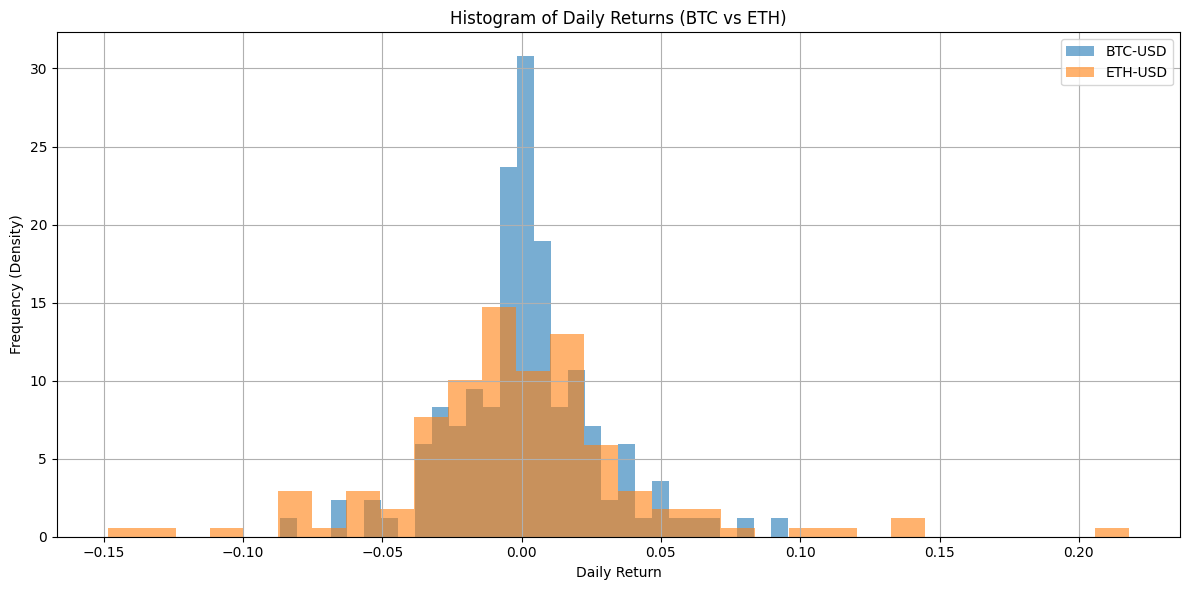

In [13]:
plt.figure(figsize=(12, 6))
plt.hist(returns['BTC-USD'], bins=30, alpha=0.6, label='BTC-USD', density=True)
plt.hist(returns['ETH-USD'], bins=30, alpha=0.6, label='ETH-USD', density=True)
plt.title('Histogram of Daily Returns (BTC vs ETH)')
plt.xlabel('Daily Return')
plt.ylabel('Frequency (Density)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Now we are trying make Normal distribution curve based on the historical data

In [14]:
from scipy.stats import norm

In [15]:
import numpy as np

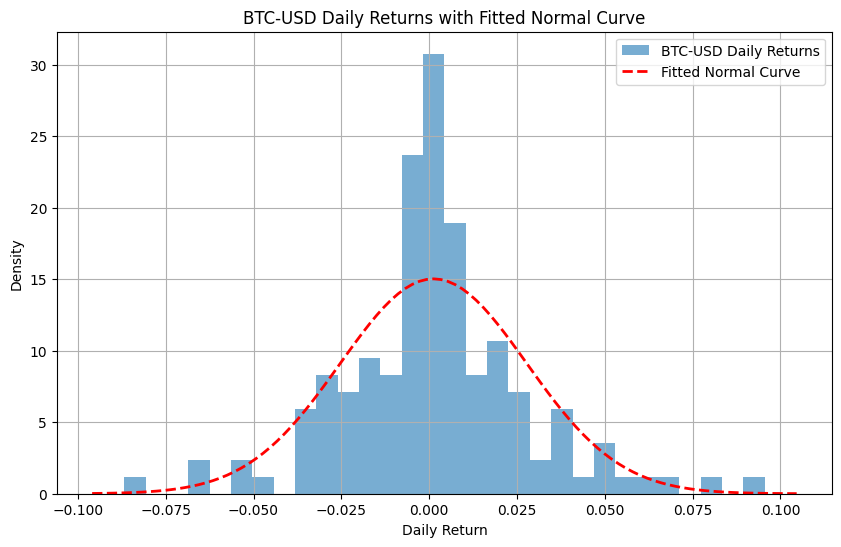

In [16]:
# I.e Let's Select one asset like BTC
asset = 'BTC-USD'
asset_returns = returns[asset]

# Step 3: Fit normal distribution
mu, std = norm.fit(asset_returns)

# Step 4: Plot histogram + fitted curve
plt.figure(figsize=(10, 6))
plt.hist(asset_returns, bins=30, density=True, alpha=0.6, label=f'{asset} Daily Returns')

# Plot fitted normal PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r--', linewidth=2, label='Fitted Normal Curve')

# Labels
plt.title(f'{asset} Daily Returns with Fitted Normal Curve')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

I would like to see how fitted both assests in Normal distribution as well as QQ plots

[*********************100%***********************]  2 of 2 completed


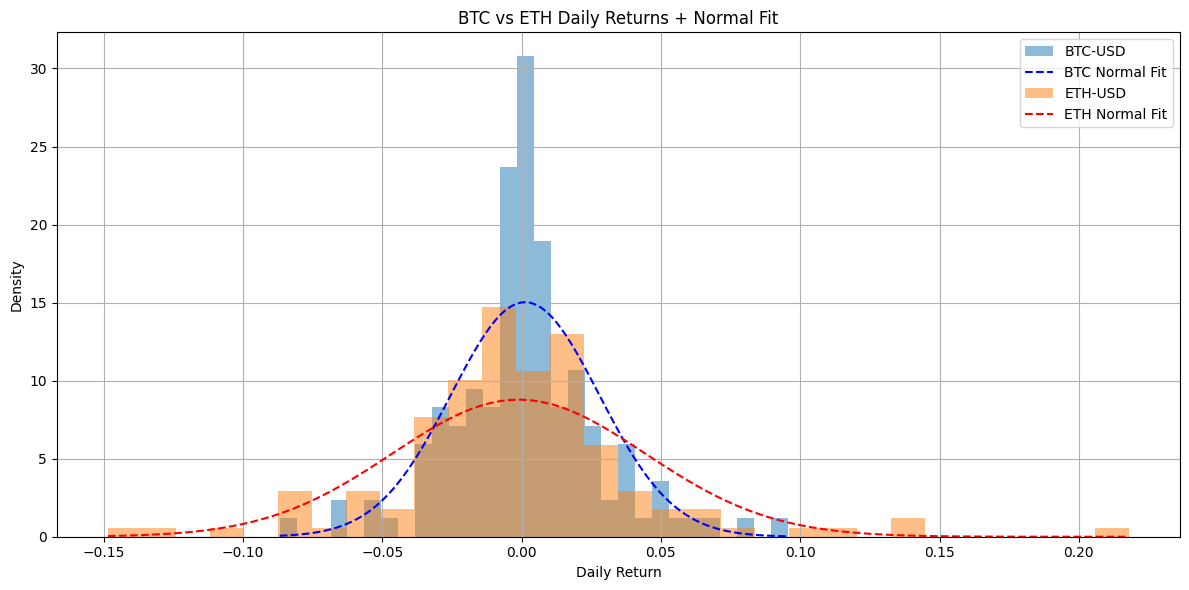

In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

# 1. Download BTC and ETH price data
data = yf.download(['BTC-USD', 'ETH-USD'], start='2025-01-01', end='2025-05-21')
returns = data['Close'].pct_change().dropna()

# 2. Fit normal distribution to each
mu_btc, std_btc = norm.fit(returns['BTC-USD'])
mu_eth, std_eth = norm.fit(returns['ETH-USD'])

# 3. Overlay histograms + normal PDFs
plt.figure(figsize=(12, 6))
x_btc = np.linspace(returns['BTC-USD'].min(), returns['BTC-USD'].max(), 100)
x_eth = np.linspace(returns['ETH-USD'].min(), returns['ETH-USD'].max(), 100)

plt.hist(returns['BTC-USD'], bins=30, alpha=0.5, density=True, label='BTC-USD')
plt.plot(x_btc, norm.pdf(x_btc, mu_btc, std_btc), 'b--', label='BTC Normal Fit')

plt.hist(returns['ETH-USD'], bins=30, alpha=0.5, density=True, label='ETH-USD')
plt.plot(x_eth, norm.pdf(x_eth, mu_eth, std_eth), 'r--', label='ETH Normal Fit')

plt.title('BTC vs ETH Daily Returns + Normal Fit')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



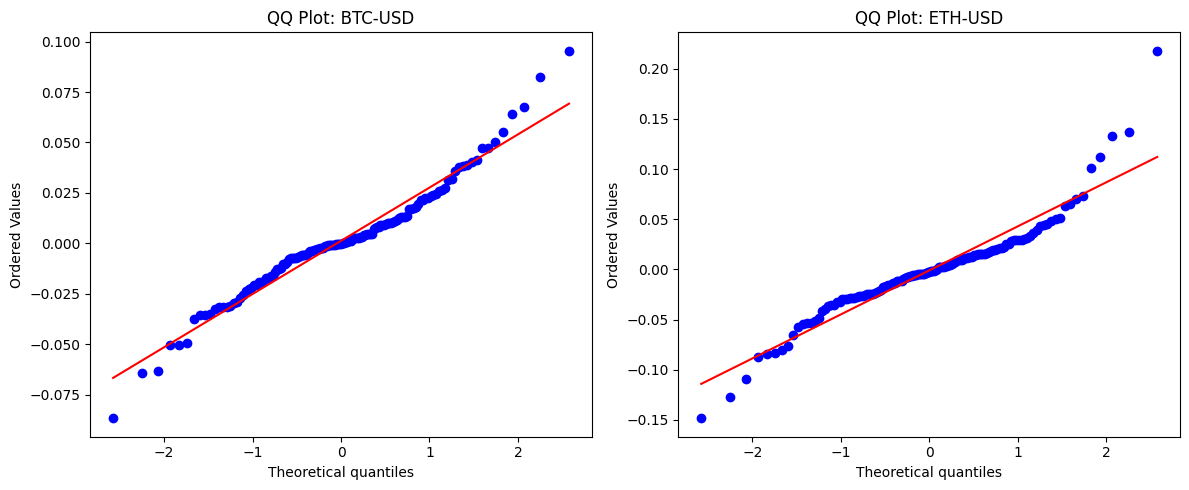


📊 Portfolio Summary (50% BTC, 50% ETH):
Mean Daily Return: 0.00011
Daily Risk (Volatility): 0.03467


In [19]:
# 4. QQ Plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
probplot(returns['BTC-USD'], dist="norm", plot=axs[0])
axs[0].set_title("QQ Plot: BTC-USD")
probplot(returns['ETH-USD'], dist="norm", plot=axs[1])
axs[1].set_title("QQ Plot: ETH-USD")
plt.tight_layout()
plt.show()

# 5. Simulate 2-asset Portfolio (50/50 BTC-ETH)
weights = np.array([0.5, 0.5])
portfolio_return = returns.dot(weights)
portfolio_mean = portfolio_return.mean()
portfolio_std = portfolio_return.std()

print("\n📊 Portfolio Summary (50% BTC, 50% ETH):")
print(f"Mean Daily Return: {portfolio_mean:.5f}")
print(f"Daily Risk (Volatility): {portfolio_std:.5f}")

Now, We will try to find commulative return over the time range, and portfolio drawdown and volatiltiy

[*********************100%***********************]  2 of 2 completed


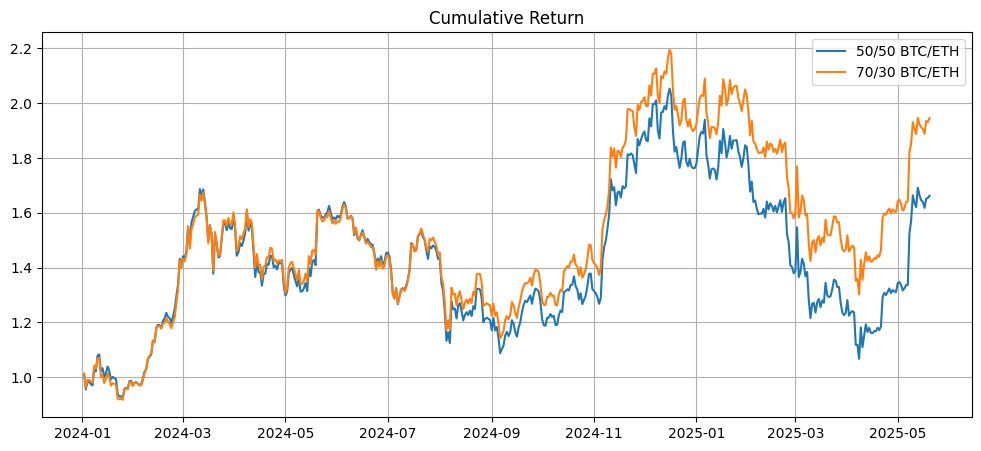

📈 Portfolio Metrics Summary

50/50 BTC‑ETH:
 Mean Daily Return  Daily Volatility  Sharpe Ratio  Max Drawdown
          0.001479          0.030911      0.047857     -0.480532

70/30 BTC‑ETH:
 Mean Daily Return  Daily Volatility  Sharpe Ratio  Max Drawdown
          0.001738          0.029092      0.059741     -0.407186


In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download 1 year of BTC and ETH data
data = yf.download(['BTC-USD', 'ETH-USD'], start='2024-01-01', end='2025-05-21')
close = data['Close']
returns = close.pct_change().dropna()

# Weights for portfolio
weights_50_50 = np.array([0.5, 0.5])
weights_70_30 = np.array([0.7, 0.3])

# Compute daily returns of portfolios
portfolio_50 = returns.dot(weights_50_50)
portfolio_70 = returns.dot(weights_70_30)

# Define function to calculate metrics
def portfolio_metrics(portfolio_returns):
    cumulative_return = (1 + portfolio_returns).cumprod()
    mean_return = portfolio_returns.mean()
    std_dev = portfolio_returns.std()
    sharpe_ratio = mean_return / std_dev
    drawdown = cumulative_return / cumulative_return.cummax() - 1
    max_drawdown = drawdown.min()
    rolling_volatility = portfolio_returns.rolling(window=21).std()

    return cumulative_return, drawdown, rolling_volatility, pd.DataFrame({
        'Mean Daily Return': [mean_return],
        'Daily Volatility': [std_dev],
        'Sharpe Ratio': [sharpe_ratio],
        'Max Drawdown': [max_drawdown]
    })

# Calculate metrics
cum_50, dd_50, vol_50, metrics_50 = portfolio_metrics(portfolio_50)
cum_70, dd_70, vol_70, metrics_70 = portfolio_metrics(portfolio_70)

# Plot cumulative return
plt.figure(figsize=(12, 5))
plt.plot(cum_50, label='50/50 BTC/ETH')
plt.plot(cum_70, label='70/30 BTC/ETH')
plt.title('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Print the metrics cleanly
print("📈 Portfolio Metrics Summary\n")
print("50/50 BTC‑ETH:")
print(metrics_50.to_string(index=False))
print("\n70/30 BTC‑ETH:")
print(metrics_70.to_string(index=False))



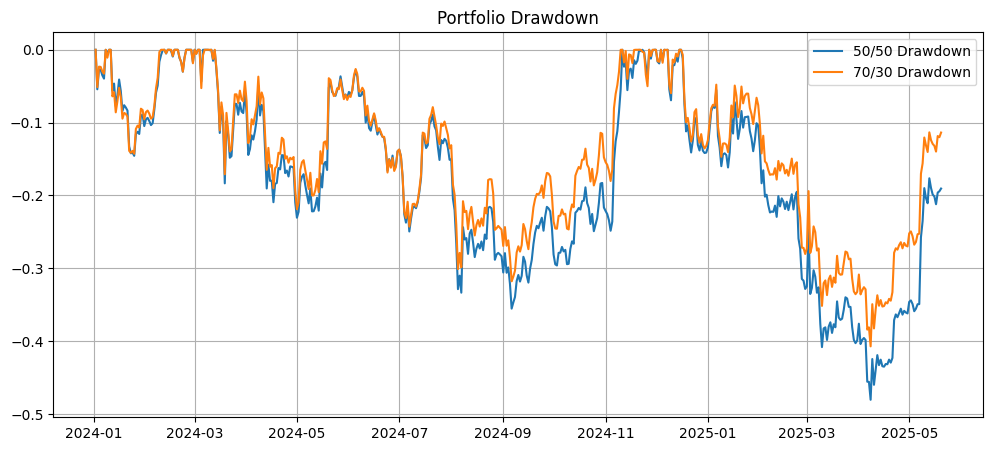

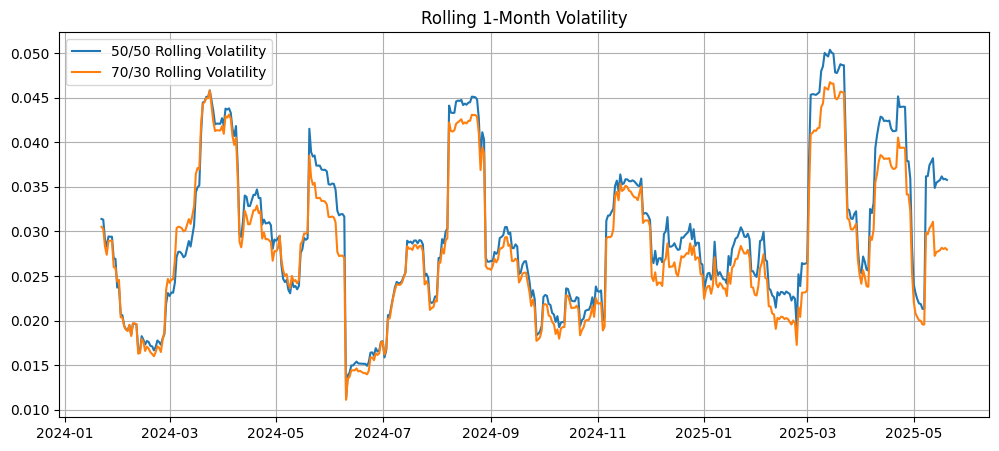

                 Mean Daily Return  Daily Volatility  Sharpe Ratio  \
50/50 BTC-ETH 0           0.001479          0.030911      0.047857   
70/30 BTC-ETH 0           0.001738          0.029092      0.059741   

                 Max Drawdown  
50/50 BTC-ETH 0     -0.480532  
70/30 BTC-ETH 0     -0.407186  


In [22]:
# Plot drawdowns
plt.figure(figsize=(12, 5))
plt.plot(dd_50, label='50/50 Drawdown')
plt.plot(dd_70, label='70/30 Drawdown')
plt.title('Portfolio Drawdown')
plt.legend()
plt.grid(True)
plt.show()

# Plot rolling volatility
plt.figure(figsize=(12, 5))
plt.plot(vol_50, label='50/50 Rolling Volatility')
plt.plot(vol_70, label='70/30 Rolling Volatility')
plt.title('Rolling 1-Month Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Combine and print summary
metrics = pd.concat([metrics_50, metrics_70], keys=['50/50 BTC-ETH', '70/30 BTC-ETH'])
print(metrics)

Calculate correlation

📊 Correlation Matrix:
Ticker    BTC-USD   ETH-USD
Ticker                     
BTC-USD  1.000000  0.798275
ETH-USD  0.798275  1.000000


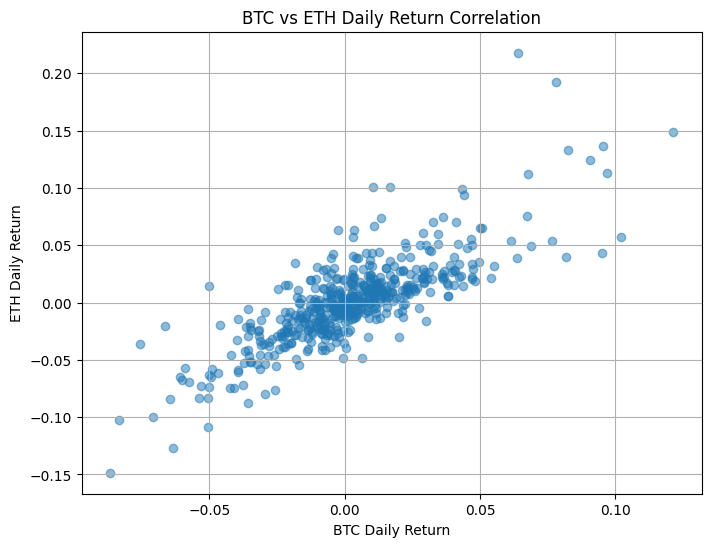

In [23]:

# Calculate correlation
correlation = returns.corr()
print("📊 Correlation Matrix:")
print(correlation)

# Plot BTC vs ETH daily returns
plt.figure(figsize=(8, 6))
plt.scatter(returns['BTC-USD'], returns['ETH-USD'], alpha=0.5)
plt.title('BTC vs ETH Daily Return Correlation')
plt.xlabel('BTC Daily Return')
plt.ylabel('ETH Daily Return')
plt.grid(True)
plt.show()


In [24]:
# Calculate and print the correlation coefficient
correlation = returns['BTC-USD'].corr(returns['ETH-USD'])
print(f"Correlation between BTC and ETH daily returns: {correlation:.4f}")


Correlation between BTC and ETH daily returns: 0.7983


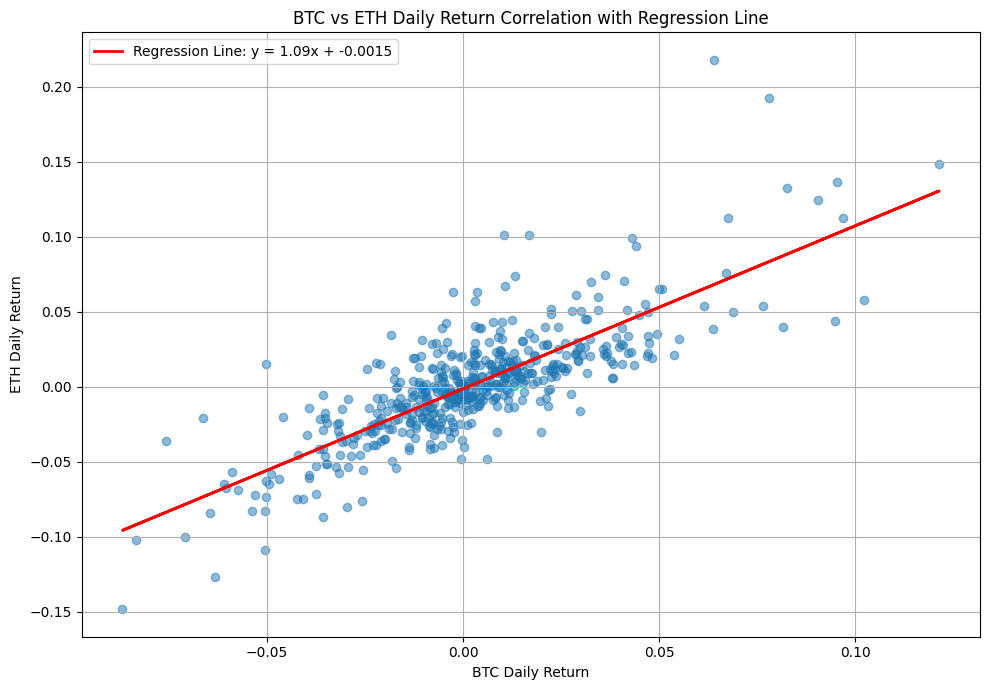

In [25]:
# Extract returns
x = returns['BTC-USD']
y = returns['ETH-USD']

# Create scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(x, y, alpha=0.5)
plt.title('BTC vs ETH Daily Return Correlation with Regression Line')
plt.xlabel('BTC Daily Return')
plt.ylabel('ETH Daily Return')
plt.grid(True)

# Fit regression line (y = mx + b)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', linewidth=2, label=f'Regression Line: y = {m:.2f}x + {b:.4f}')
plt.legend()

plt.tight_layout()
plt.show()

Now we will analyse the pair trade in both assests

[*********************100%***********************]  2 of 2 completed



📊 Signal Summary:
long_ETH_short_BTC    28
short_ETH_long_BTC    25
no_trade              87
dtype: int64


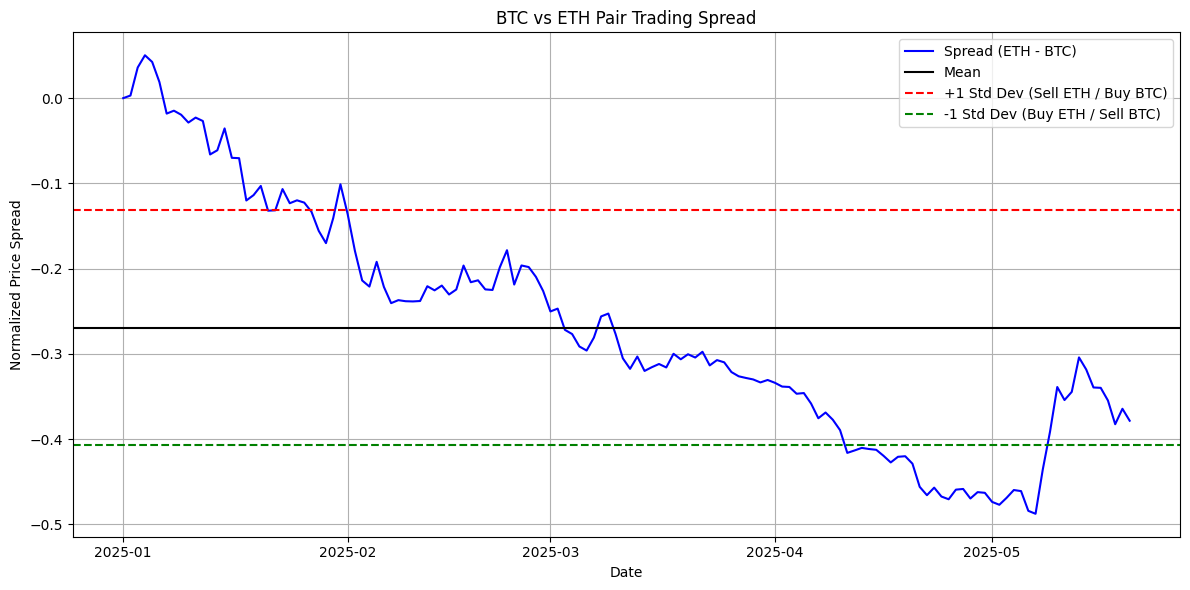

In [26]:

# Step 1: Get BTC and ETH price data
data = yf.download(['BTC-USD', 'ETH-USD'], start='2025-01-01', end='2025-05-21')
close = data['Close']
norm = close / close.iloc[0]  # Normalize prices

# Step 2: Calculate spread
spread = norm['ETH-USD'] - norm['BTC-USD']
spread_mean = spread.mean()
spread_std = spread.std()
upper = spread_mean + spread_std
lower = spread_mean - spread_std

# Step 3: Generate trading signals
signals = pd.DataFrame(index=spread.index)
signals['long_ETH_short_BTC'] = spread < lower
signals['short_ETH_long_BTC'] = spread > upper
signals['no_trade'] = (spread >= lower) & (spread <= upper)

# Step 4: Count signal days
print("\n📊 Signal Summary:")
print(signals.sum())

# Step 5: Plot spread and signals
plt.figure(figsize=(12, 6))
plt.plot(spread, label='Spread (ETH - BTC)', color='blue')
plt.axhline(spread_mean, color='black', linestyle='-', label='Mean')
plt.axhline(upper, color='red', linestyle='--', label='+1 Std Dev (Sell ETH / Buy BTC)')
plt.axhline(lower, color='green', linestyle='--', label='-1 Std Dev (Buy ETH / Sell BTC)')
plt.title('BTC vs ETH Pair Trading Spread')
plt.xlabel('Date')
plt.ylabel('Normalized Price Spread')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
